In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#load and read data files
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [4]:
#check data sets
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Survived', ylabel='Density'>

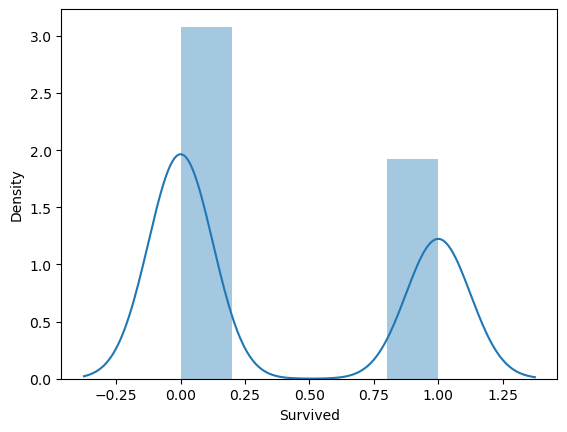

In [10]:
# checking aim and plotting
sns.distplot(train_data['Survived'])

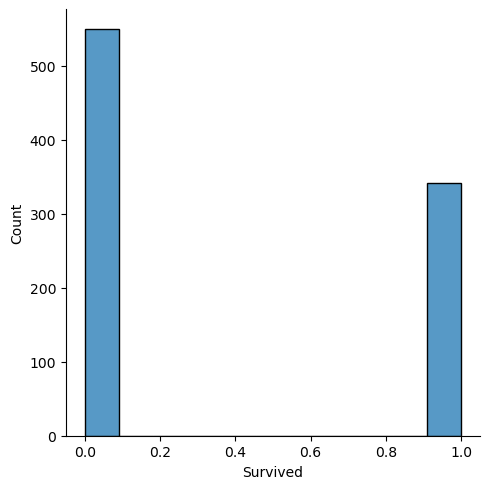

In [11]:
sns.displot(train_data['Survived'])

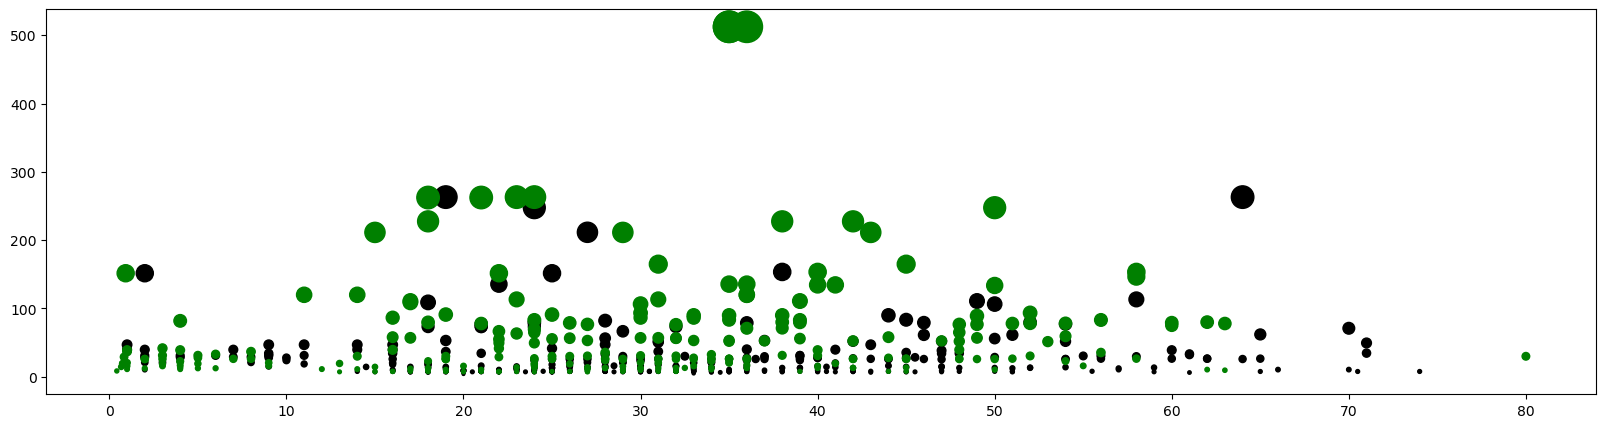

In [12]:
#plotting graph 
plt.figure(figsize=(20,5))
axis = plt.subplot()
axis.scatter(train_data[train_data['Survived'] == 0]['Age'], train_data[train_data['Survived'] == 0]['Fare'], c='black', s=train_data[train_data['Survived'] == 0]['Fare']);
axis.scatter(train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 1]['Fare'], c='green', s=train_data[train_data['Survived'] == 1]['Fare'])


In [13]:
aim = train_data.Survived
train_data.drop(['Survived'], axis=1, inplace=True)
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
#join both data sets
all_data = train_data.append(test_data)
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
#find the titles in names and form a column
titles = set()
for name in all_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)
titledictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}


# we extract the title from each name and map each title
all_data['Title'] = all_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
all_data['Title'] = all_data.Title.map(titledictionary)
all_data


{'Mlle', 'Lady', 'Dona', 'Master', 'Major', 'Capt', 'Mrs', 'Rev', 'Mme', 'Sir', 'Col', 'the Countess', 'Jonkheer', 'Ms', 'Miss', 'Dr', 'Mr', 'Don'}


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [16]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             1
dtype: int64

In [17]:
# check all null values

for column in all_data:
    if all_data[column].dtype=="O":
        all_data[column].fillna(all_data[column].mode()[0], inplace=True)
    if all_data[column].dtype=="int":
        all_data[column].fillna(all_data[column].mode()[0], inplace=True)
    if all_data[column].dtype=='float':
        all_data[column].fillna(all_data[column].median(), inplace=True)
        
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C23 C25 C27,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,C23 C25 C27,S,Mr


In [18]:
all_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

<AxesSubplot:>

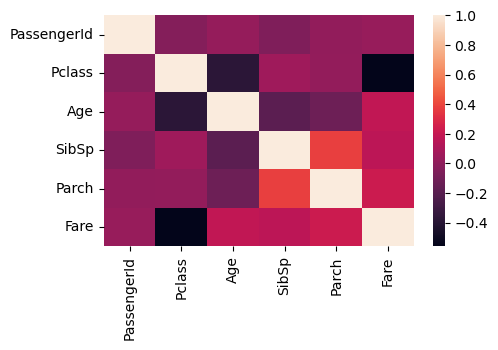

In [19]:
# make a heatmap to correlate surviving/death
plt.figure(figsize=(5,3))
heatmap=all_data.corr()
sns.heatmap(heatmap)

In [20]:
all_data['AgeGroup'] = pd.cut(x=all_data['Age'], bins=[0, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
all_data['FareGroup'] = pd.cut(x=all_data['Fare'], bins=[0, 100, 500, 1000], labels=['low', 'middle', 'high'])
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,Mr,young adult,low
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,young adult,low
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,Miss,young adult,low
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,young adult,low
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,Mr,young adult,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C23 C25 C27,S,Mr,young adult,low
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr,young adult,middle
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C23 C25 C27,S,Mr,young adult,low
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,C23 C25 C27,S,Mr,young adult,low


In [21]:
all_data['AgeGroup'] = all_data['AgeGroup'].astype(str)
all_data['FareGroup'] = all_data['FareGroup'].astype(str)

In [22]:
#encoding
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()

for column in all_data:
    if all_data[column].dtype=="O":
        all_data[column] = encode.fit_transform(all_data[column].values.reshape(-1,1))
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup
0,1,3,155.0,1.0,22.0,1,0,720.0,7.2500,80.0,2.0,2.0,3.0,1.0
1,2,1,286.0,0.0,38.0,1,0,816.0,71.2833,106.0,0.0,3.0,3.0,1.0
2,3,3,523.0,0.0,26.0,0,0,914.0,7.9250,80.0,2.0,1.0,3.0,1.0
3,4,1,422.0,0.0,35.0,1,0,65.0,53.1000,70.0,2.0,3.0,3.0,1.0
4,5,3,22.0,1.0,35.0,0,0,649.0,8.0500,80.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1126.0,1.0,28.0,0,0,711.0,8.0500,80.0,2.0,2.0,3.0,1.0
414,1306,1,891.0,0.0,39.0,0,0,834.0,108.9000,64.0,0.0,2.0,3.0,2.0
415,1307,3,1046.0,1.0,38.5,0,0,872.0,7.2500,80.0,2.0,2.0,3.0,1.0
416,1308,3,1227.0,1.0,28.0,0,0,579.0,8.0500,80.0,2.0,2.0,3.0,1.0


In [23]:
#normalise the data
all_data = (all_data - all_data.min()) / (all_data.max() - all_data.min())
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup
0,0.000000,1.0,0.118683,1.0,0.273456,0.125,0.000000,0.775862,0.014151,0.432432,1.0,0.4,1.0,0.333333
1,0.000765,0.0,0.218989,0.0,0.473882,0.125,0.000000,0.879310,0.139136,0.572973,0.0,0.6,1.0,0.333333
2,0.001529,1.0,0.400459,0.0,0.323563,0.000,0.000000,0.984914,0.015469,0.432432,1.0,0.2,1.0,0.333333
3,0.002294,0.0,0.323124,0.0,0.436302,0.125,0.000000,0.070043,0.103644,0.378378,1.0,0.6,1.0,0.333333
4,0.003058,1.0,0.016845,1.0,0.436302,0.000,0.000000,0.699353,0.015713,0.432432,1.0,0.4,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.996942,1.0,0.862175,1.0,0.348616,0.000,0.000000,0.766164,0.015713,0.432432,1.0,0.4,1.0,0.333333
414,0.997706,0.0,0.682236,0.0,0.486409,0.000,0.000000,0.898707,0.212559,0.345946,0.0,0.4,1.0,0.666667
415,0.998471,1.0,0.800919,1.0,0.480145,0.000,0.000000,0.939655,0.014151,0.432432,1.0,0.4,1.0,0.333333
416,0.999235,1.0,0.939510,1.0,0.348616,0.000,0.000000,0.623922,0.015713,0.432432,1.0,0.4,1.0,0.333333


In [24]:
#standardise the data
all_data = (all_data - np.average(all_data)) / (np.std(all_data))
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FareGroup
0,-1.485965,1.362866,-1.075525,1.191926,-0.964328,-2.337850,-4.465404,1.157059,-4.112144,0.022558,1.402355,-0.18375,1.45381,-0.871693
1,-1.483318,-1.025148,-0.728198,-0.896567,0.275952,-2.337850,-4.465404,1.502429,-2.874110,1.031072,-1.054851,1.07099,1.45381,-0.871693
2,-1.480672,1.362866,-0.099827,-0.896567,-0.654258,-3.298225,-4.465404,1.854993,-4.099094,0.022558,1.402355,-1.43849,1.45381,-0.871693
3,-1.478026,-1.025148,-0.367614,-0.896567,0.043400,-2.337850,-4.465404,-1.199367,-3.225670,-0.365332,1.402355,1.07099,1.45381,-0.871693
4,-1.475379,1.362866,-1.428156,1.191926,0.043400,-3.298225,-4.465404,0.901630,-4.096677,0.022558,1.402355,-0.18375,1.45381,-0.871693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.964906,1.362866,1.498940,1.191926,-0.499223,-3.298225,-4.465404,1.124681,-4.096677,0.022558,1.402355,-0.18375,1.45381,-0.871693
414,1.967552,-1.025148,0.875872,-0.896567,0.353470,-3.298225,-4.465404,1.567185,-2.146820,-0.598066,-1.054851,-0.18375,1.45381,2.156421
415,1.970199,1.362866,1.286832,1.191926,0.314711,-3.298225,-4.465404,1.703894,-4.112144,0.022558,1.402355,-0.18375,1.45381,-0.871693
416,1.972845,1.362866,1.766727,1.191926,-0.499223,-3.298225,-4.465404,0.649798,-4.096677,0.022558,1.402355,-0.18375,1.45381,-0.871693


In [25]:
features = ['Pclass','Sex','Title','AgeGroup','FareGroup','Embarked']
y = aim
X = all_data[features][ : len(train_data)]
X_test = all_data[features][len(train_data) : ]
y.shape, X.shape, X_test.shape

((891,), (891, 6), (418, 6))

In [26]:
#Splitting the data into training data & test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((801, 6), (90, 6), (801,), (90,), (418, 6))

In [27]:
# model SVC

from sklearn.svm import SVC
svc_model = SVC(C=10, gamma='scale', kernel='poly',random_state=42).fit(X_train, y_train)
print(svc_model.score(X_train, y_train))

0.8389513108614233


In [28]:
y_predict = svc_model.predict(X_val)
print(svc_model.score(X_val, y_val))

0.8111111111111111


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_predict))

[[52  3]
 [14 21]]


In [30]:
df=pd.DataFrame({'Actual': y_val, 'Predicted': y_predict})
df.head()

,Actual,Predicted
387,1,1
642,0,0
782,0,0
142,1,1
222,0,0


In [31]:
predictions = svc_model.predict(X_test)
submission_data.Survived = predictions
submission_data.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(623, 6)
(268, 6)
(623,)
(268,)


In [33]:
#model Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [34]:
#accuracy on the training data
lr_X_train_preds = lr_model.predict(X_train)
lr_X_test_preds = lr_model.predict(X_test)
lr_training_data_accuracy = accuracy_score(y_train, lr_X_train_preds)
print(lr_training_data_accuracy)

0.7929373996789727


In [35]:
#accuracy on test data
lr_X_test_preds = lr_model.predict(X_test)
lr_X_test_preds

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0])

In [36]:
# score
lr_test_data_accuracy = accuracy_score(y_test, lr_X_test_preds)
print('Accuracy score for test data is ', lr_X_test_preds)

Accuracy score for test data is  [1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 1 0 1 0]


In [37]:
#model KNN

from sklearn.neighbors import KNeighborsClassifier 
knn_model=KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [38]:
#accuracy on the training data
knn_X_train_preds = knn_model.predict(X_train)
knn_X_test_preds = knn_model.predict(X_test)
knn_training_data_accuracy = accuracy_score(y_train,knn_X_train_preds)
print(knn_training_data_accuracy)

0.8250401284109149


In [39]:
#accuracy on test data
knn_X_test_preds = knn_model.predict(X_test)
knn_X_test_preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0])

In [40]:
# score
knn_test_data_accuracy = accuracy_score(y_test,knn_X_test_preds)
print('Accuracy score for test data : ', knn_X_test_preds)

Accuracy score for test data :  [0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 1 1 0 0 0]
